In [25]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle

In [26]:
# ['cases', 'deaths', 'recovered]
events = 'cases'

df_us = pickle.load(open('../pickles/c19_us.p', 'rb'))[events]
df_us_state = pickle.load(open('../pickles/c19_us_state.p', 'rb'))[events]
df_us_county = pickle.load(open('../pickles/c19_us_county.p', 'rb'))[events]

In [27]:
def sum_by_day(df):
    return df.groupby('day').sum().reset_index()

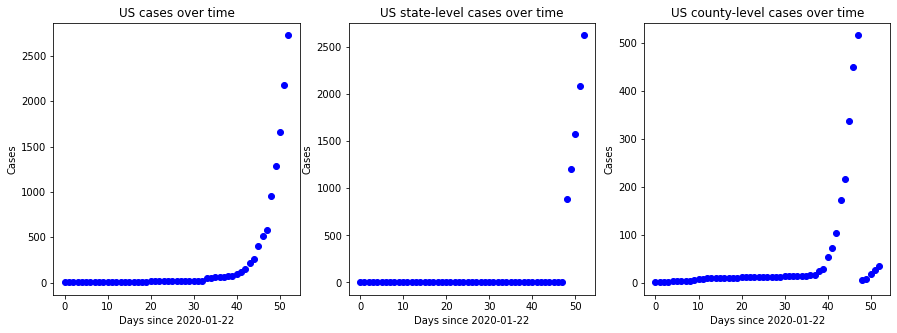

In [28]:
plt.figure(figsize=(15, 5))

df_us = sum_by_day(df_us)
plt.subplot(131)
plt.plot(df_us.day, df_us.cases, 'bo')
plt.title('US cases over time')
plt.ylabel('Cases')
plt.xlabel('Days since 2020-01-22')

df_us_state = sum_by_day(df_us_state)
plt.subplot(132)
plt.plot(df_us.day, df_us_state.cases, 'bo')
plt.title('US state-level cases over time')
plt.ylabel('Cases')
plt.xlabel('Days since 2020-01-22')

df_us_county = sum_by_day(df_us_county)
plt.subplot(133)
plt.plot(df_us.day, df_us_county.cases, 'bo')
plt.title('US county-level cases over time')
plt.ylabel('Cases')
plt.xlabel('Days since 2020-01-22')

plt.show()